In [430]:
# current date, for retrieving data from proper location.
year = "2023"
month = "May"
day = "30"

## Imports and initialization

In [431]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import minimize
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
import scipy.constants as const
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import scipy.constants as const
from arc import *
import random
# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon
from scipy.signal import savgol_filter
from scipy.optimize import fmin
from scipy.optimize import brentq
from scipy import optimize
from scipy.interpolate import interp1d

In [432]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [433]:
reloadMyModules(30)

In [434]:
atomlocs = [2, 2, 3, 3, 1]

In [435]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

# Light assisted two body loss rate

In [9]:
def trap_depth_gaussian(pol, P, wx, wy):
    """ trap depth for a focused gaussian beam
        pol: polarizability in units of Hz m^2/W
        P: power of the beam (W)
        wx: waist along x direction in m
        wy: waist along y direction in m
        return trap depth in Hz
    """
    I0_elliptical_xy= 2*P/ (np.pi* wx * wy) #multiply waists from um to cm such 
    U0_xy = - pol * I0_elliptical_xy/4 #in Hz. Divide by 4 because we used peak electric field in the calculation
                                    #of polarizability instead of rms.
    return U0_xy

mass_Rb = 87*const.u

### Sanity check: Tweezer
1.7 mW of 852nm focused on a round waist of 0.75 um, should yieald 1 mK trap depth

In [10]:
atom = Rubidium87()
calc = DynamicPolarizability(atom, atom.groundStateN, 0, 0.5)
calc.defineBasis(atom.groundStateN, atom.groundStateN+15)

alpha0_twz, alpha1_twz, alpha2_twz, core, dynamic, closestState = calc.getPolarizability(852e-9, units="SI", accountForStateLifetime=True)

tweez_polB_GS=2*alpha0_twz*1/(const.epsilon_0*const.speed_of_light) # units of Hz m^2/W. We consider only the scalar polarizability
print("Polarization of GS with 852nm = %.3e Hz m^2/W." % (tweez_polB_GS))
U0_tweezer = trap_depth_gaussian(tweez_polB_GS, 1.76e-3, 0.707e-6, 0.707e-6) #in Hz
print("Trap depth in uK: ", U0_tweezer*const.h/const.k*1e6)

Polarization of GS with 852nm = 3.884e-02 Hz m^2/W.
Trap depth in uK:  -1044.518430852995


In [11]:
def trap_volume(T0, omega_ax, omega_rad, mass=mass_Rb):
    """
    T0 initial temperature in K
    omega_ax (rad) axial (radial) trap fequencies
    return in m^3
    """
    omega = (omega_ax * omega_rad**2)**(1/3)
    return (2*np.pi*const.k*T0/ (mass* omega**2))**(3/2)

def calc_beta(gamma,V):
    """
    gamma is the fitted two-body loss decay rate. 
    V trap volume
    return in SI units m^3/s
    """
    return gamma * 2* np.sqrt(2) * V

## Monte-Carlo simulation

In [12]:
def dq_two_body(beta_prime, N, dt):
    return beta_prime * N*(N-1)*dt/2

def dq_one_body(gamma, N, dt):
    return gamma * N *dt

def P1(U, T0, alpha, t):
    """ Survival probability of an atom due to heating. Assuming a harmonic trap and a Boltzmann energy distribution
    U: trap depth in J
    T0 initial temperature
    alpha: heating rate"""
    eta= U/ (const.k *(T0 + alpha*t))
    return 1- (1+ eta + 1/2 * eta**2) * np.exp(-eta)

def number_of_lost_atoms(key_name):
    if key_name == 'no_loss':
            return 0 # no loss
    elif key_name== 'one_loss':
            return 1 # one loss
    elif key_name== 'two_loss':
            return 2 # two loss

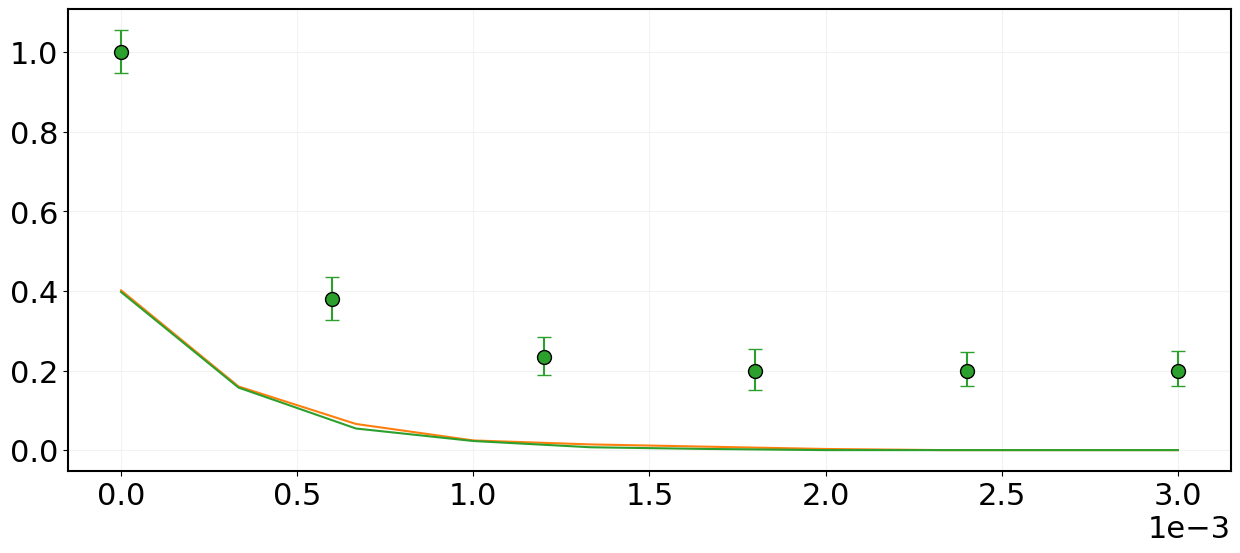

In [424]:
beta_prime = 1.8 *1e3 #atoms/ms
T= 15e-6
# tweezer_depth= abs(U0_tweezer_inJ)
trajectories = 700
ts = np.linspace(0, 3e-3, 10) 
dt_step = ts[1]-ts[0]
surv_sum_traj = np.zeros(len(ts))
for j in np.arange(trajectories):
    N0= 2 # intial number of atoms
    surv_dts =np.zeros(len(ts))
    surv_dts[0]= N0 
    for i in range(len(ts)):
        if (i==0):
            num_atoms_at_this_step = surv_dts[0]
        else:
            num_atoms_at_this_step = surv_dts[i-1]
        P_two_body_loss = dq_two_body(beta_prime, num_atoms_at_this_step, dt_step)
        P_one_body_loss= 0 # assuming no one body loss for now
        prob_no_loss = (1-P_one_body_loss)*(1-P_two_body_loss)
        prob_one_loss = P_one_body_loss*(1-P_two_body_loss)
        prob_two_loss = (1-P_one_body_loss)*P_two_body_loss

        prob_dict= {'no_loss': prob_no_loss, 'one_loss': prob_one_loss, 'two_loss': prob_two_loss }
        #define a probability order
        ordered_dict = (sorted(prob_dict.items(), key=lambda x:x[1])) # returns an ordered array, ordered by the probability value. eg. [('one_loss', 1), ('no_loss', 2), ('two_loss', 4)]
        #now we choose which decay channel will happen using Monte Carlo
        p_rand = random.random() 
        if p_rand < ordered_dict[0][1]: 
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[0][0])
        elif p_rand > ordered_dict[0][1] and p_rand < ordered_dict[1][1] : 
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[1][0])
        elif p_rand > ordered_dict[1][1]: 
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[2][0])
    
    #in theory this should be it. however in our experiment we apply a 2->1 collision if we still have two atoms at the end.
    for k in range(len(surv_dts)):
          if surv_dts[k] ==2:
                surv_dts[k] -= 1

    surv_sum_traj += surv_dts
# surv_sum_traj[0] = 0.8
surv_average = surv_sum_traj/ trajectories

fig, ax = plt.subplots(figsize=(15, 6))
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'load one')
plt.plot(ts,surv_average)
betaPrimeFit(ts,beta_prime,1);

In [17]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

## test data

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:48:50: on (Y-M-D) 2023-11-20, And ended at 15:0:26: on 2023-11-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:48:50: on (Y-M-D) 2023-11-20, And ended at 15:0:26: on 2023-11-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 2.475796454988173 gamma uncertainty = 0.04650753978121326


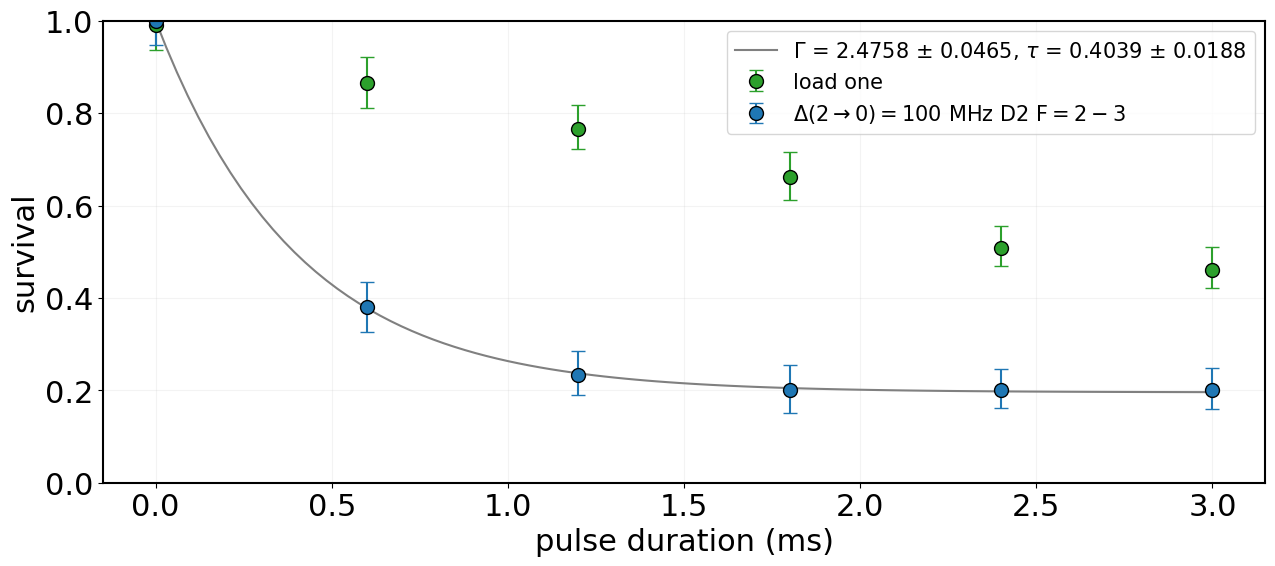

In [441]:
##pulse duration
reloadMyModules(20,'november')
fileId = 32  #16-7
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 1
avgTferData1[3] = 0.2
avgTferData1[4] = 0.2
avgTferData1[5] = 0.2

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant


dataset2 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]
avgTferData2[0] = .99
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(key1,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'load one')

decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = 100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
# plt.plot(x_fit,surv_average,label='Monte Carlo')
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_b100_F23d2 = decay_constant
gamma_b100_unc_F23d2 = decay_constant_uncertainty
tau_b100_F23d2 = one_over_e_time
tau_b100_unc_F23d2 = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## Define monte carlo and fitting functions

In [425]:
def betaPrimeFit(ts, betaPrime,initial_survival):
    init_surv = initial_survival
    ss_surv = 0.2
    trajectories = 700
    dt_step = ts[1] - ts[0]
    surv_sum_traj = np.zeros(len(ts))
    
    for j in np.arange(trajectories):
        N0 = 2  # Initial number of atoms
        surv_dts = np.zeros(len(ts))
        surv_dts[0] = N0

        for i in range(len(ts)):
            if i == 0:
                num_atoms_at_this_step = surv_dts[0]
            else:
                num_atoms_at_this_step = surv_dts[i - 1]

            P_two_body_loss = dq_two_body(betaPrime, num_atoms_at_this_step, dt_step)
            P_one_body_loss = 0  # Assuming no one-body loss for now

            prob_no_loss = (1 - P_one_body_loss) * (1 - P_two_body_loss)
            prob_one_loss = P_one_body_loss * (1 - P_two_body_loss)
            prob_two_loss = (1 - P_one_body_loss) * P_two_body_loss

            prob_dict = {'no_loss': prob_no_loss, 'one_loss': prob_one_loss, 'two_loss': prob_two_loss}

            # Define a probability order
            ordered_dict = sorted(prob_dict.items(), key=lambda x: x[1])

            # Choose which decay channel will happen using Monte Carlo
            p_rand = random.random()

            if p_rand < ordered_dict[0][1]:
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[0][0])
            elif ordered_dict[0][1] < p_rand < ordered_dict[1][1]:
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[1][0])
            else:
                surv_dts[i] = num_atoms_at_this_step - number_of_lost_atoms(ordered_dict[2][0])

        # In theory, this should be it. However, in our experiment, we apply a 2->1 collision if we still have two atoms at the end.
        for k in range(len(surv_dts)):
            if surv_dts[k] == 2:
                surv_dts[k] -= 1

        surv_sum_traj += surv_dts

    surv_average = surv_sum_traj / trajectories
    # plt.plot(ts, ss_surv + (init_surv - ss_surv) * surv_average)
    plt.plot(ts, surv_average)
    # return ss_surv + (init_surv - ss_surv) * surv_average
    return surv_average

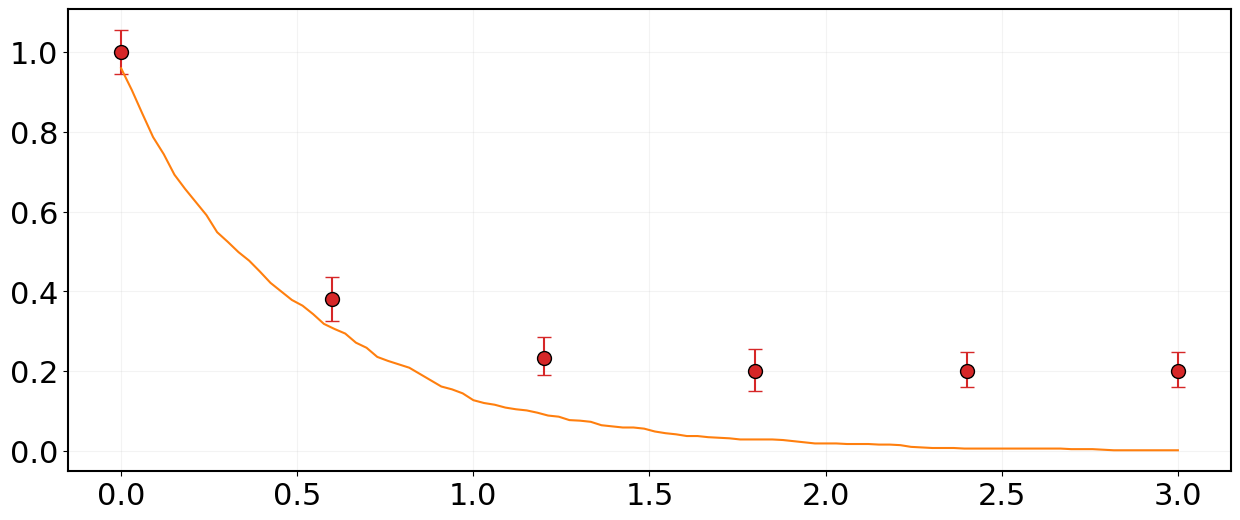

In [426]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'load one')

times= np.linspace(0,3, 100)
betaPrimeFit(times,1.8,.84);

## curve fit

199.9998635219758


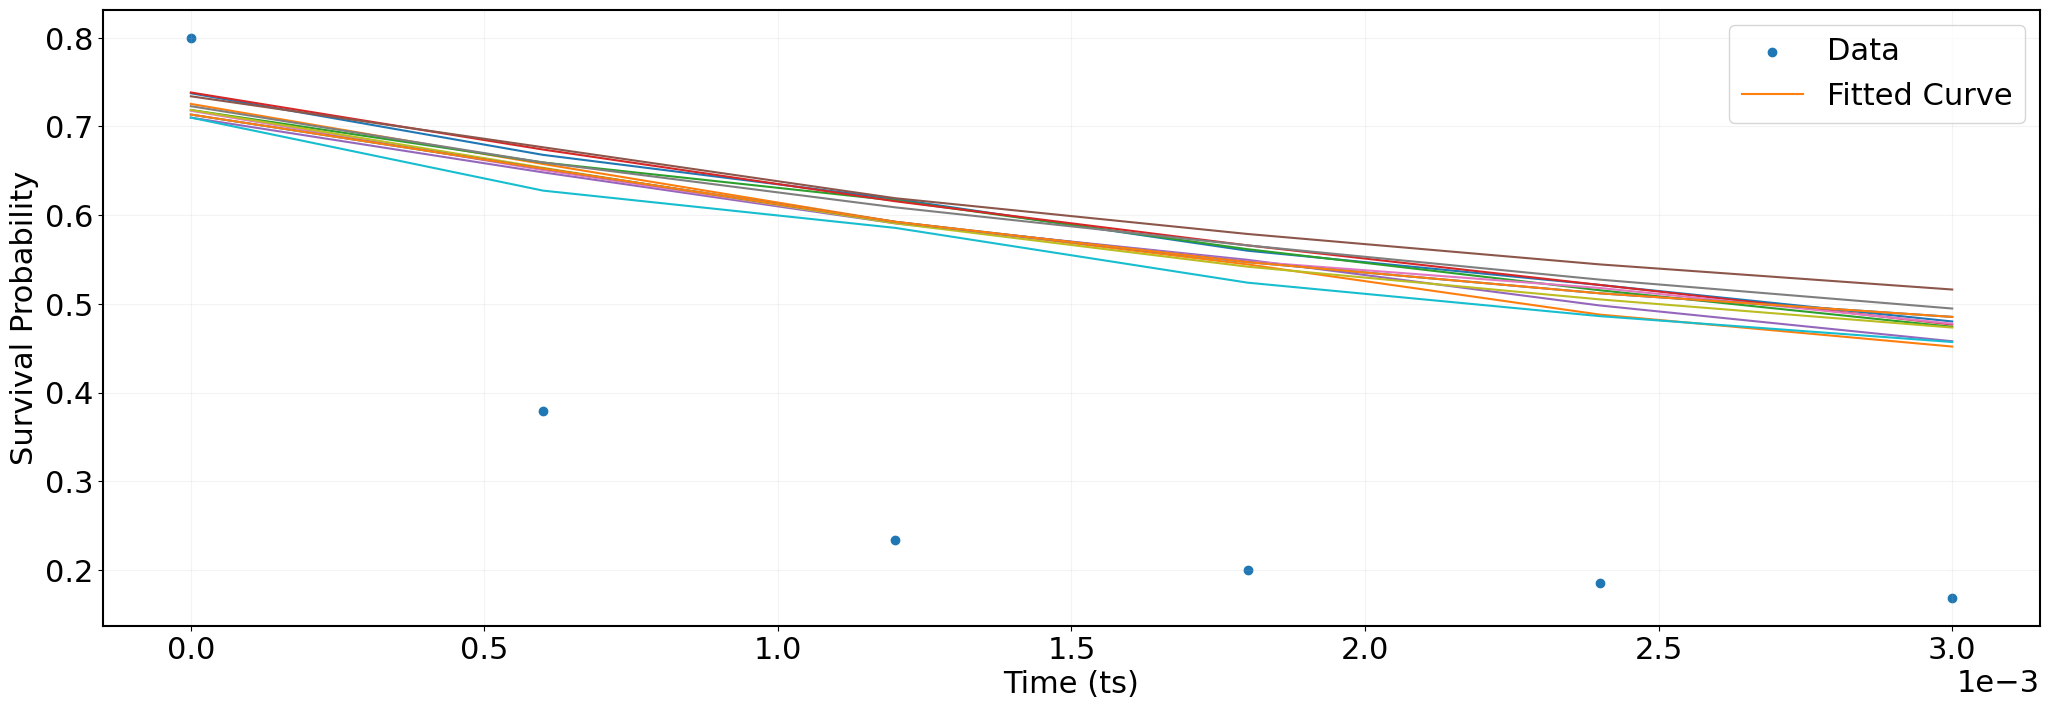

Optimized Parameter:
Optimal BetaPrime: 199.9998635219758


In [218]:
# Define a residual function
def residual(x_data, betaPrime):
    model_data = betaPrimeFit(x_data, betaPrime)
    return y_data - model_data

# Simulated data
x_data = np.array([1.01e-07, 0.0006, 0.0012, 0.0018, 0.0024, 0.003])
y_data = np.array([0.8, 0.37974684, 0.23376623, 0.2, 0.18518519, 0.16901408])

# Initial guess for the parameter
initial_guess = (20e1)  # Replace with an appropriate initial value

# Fit the model to the data using curve_fit
params, covariance = curve_fit(residual, x_data, y_data, p0=initial_guess)

# Extract the optimized parameter
optimal_betaPrime = params[0]
print(optimal_betaPrime)
# Generate the fitted curve
fit_curve = betaPrimeFit(x_data, optimal_betaPrime)

# Plot the data and fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, fit_curve, label='Fitted Curve')
plt.legend()
plt.xlabel('Time (ts)')
plt.ylabel('Survival Probability')
plt.show()

print("Optimized Parameter:")
print("Optimal BetaPrime:", optimal_betaPrime)

## scipy minimize

In [ ]:
# Define a residual function for optimization
def residual(betaPrime):
    model_data = betaPrimeFit(x_data, betaPrime)
    return np.sum((y_data - model_data) ** 2)  # Least squares residual

# Simulated data
x_data = np.array([1.01e-07, 0.0006, 0.0012, 0.0018, 0.0024, 0.003])
y_data = np.array([0.8, 0.37974684, 0.23376623, 0.2, 0.18518519, 0.16901408])

# Initial guess for the parameter
initial_guess = 1.0  # Adjust the initial guess as needed

# Perform the optimization
result = minimize(residual, initial_guess, method='Nelder-Mead')

# Extract the optimized parameter
optimal_betaPrime = result.x[0]

# Generate the fitted curve
fit_curve = betaPrimeFit(x_data, optimal_betaPrime)

# Plot the data and fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, fit_curve, label='Fitted Curve')
plt.legend()
plt.xlabel('Time (ts)')
plt.ylabel('Survival Probability')
plt.show()

print("Optimized Parameter:")
print("Optimal BetaPrime:", optimal_betaPrime)

## Brute force fitting

In [235]:
# Used for the fitting:
def residual(betaPrime, x_pts, data, uncertainties):
    model = betaPrimeFit(x_pts, betaPrime)
    return (((model-data)/uncertainties)**2).sum()

In [236]:
def get_smoothed_residual_f(x, residual):
    _sg = savgol_filter(residual, window_length=51, polyorder=3) # window size 51, polynomial order 3
    _f = interp1d(x, _sg, kind='cubic')
    return _f

In [237]:
def get_minimum(_f, x0):
    _xmin,_fmin, _,_,warnflag = fmin(_f, 
        x0, disp=False,full_output=True)
    if warnflag:
        print(f"{warnflag:d} ---  1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.")
    return _xmin, _fmin

In [238]:
def get_root(_f, y0, xbound0, xbound1):
    _f_offset = lambda x : (_f(x) - y0)
    root = brentq(_f_offset, xbound0, xbound1, disp=False)
    return root
    # return get_minimum(_f=_f_offset, x0=x0)

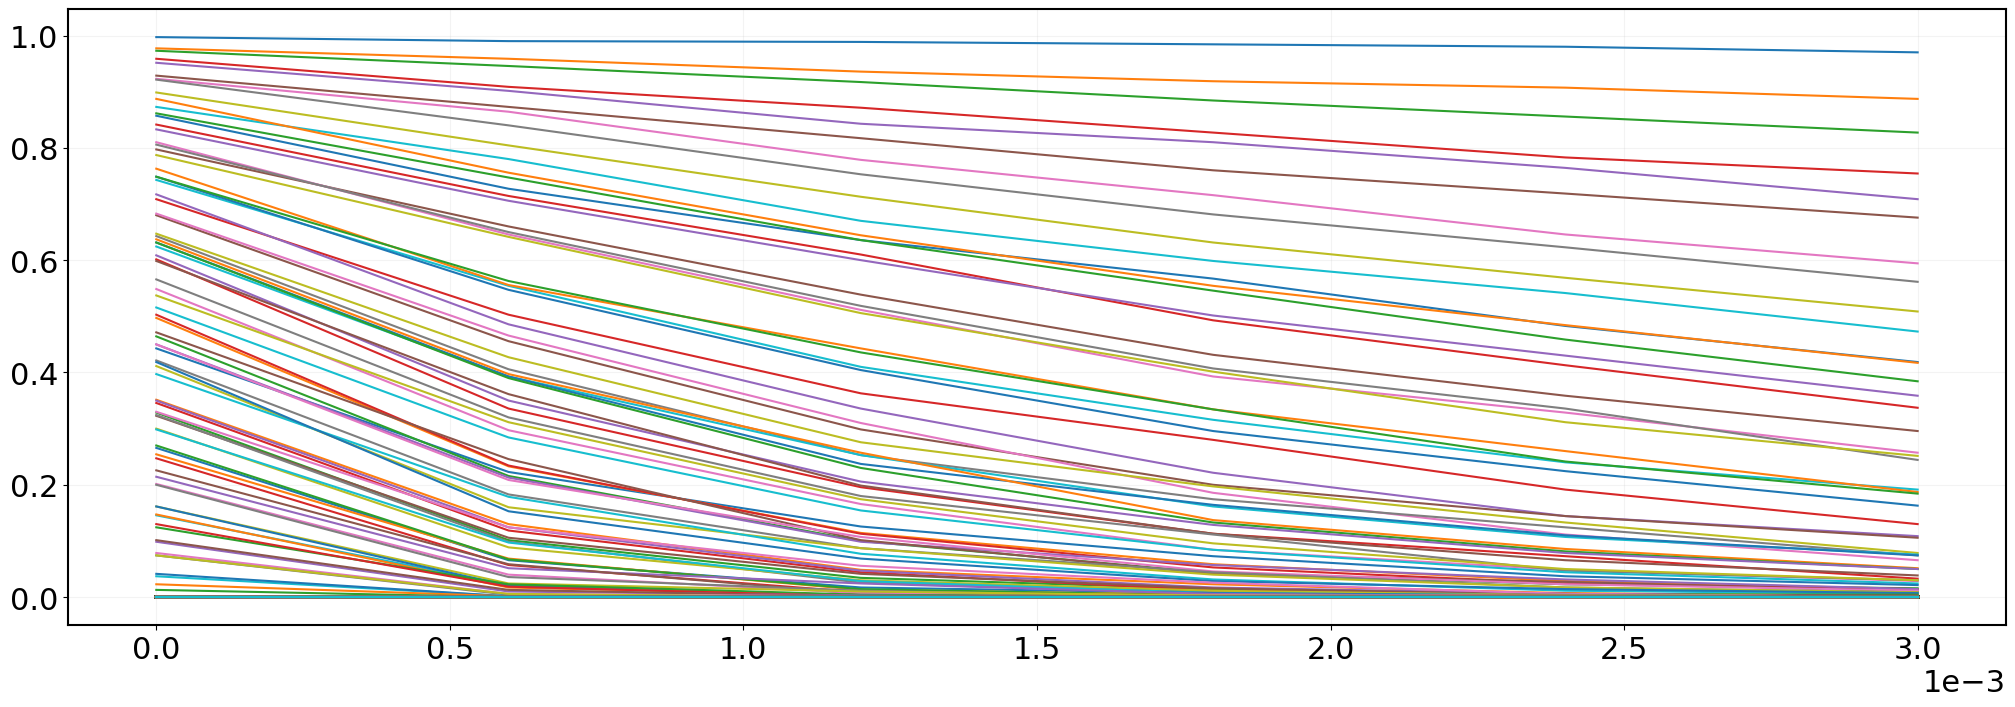

In [418]:
def residual(betaPrime, x_pts, data, uncertainties,initial_survival):
    model = betaPrimeFit(x_pts, betaPrime, initial_survival=initial_survival)  
    return (((model - data) / uncertainties) ** 2).sum()

surv = avgTferData1
surv_unc = [np.mean([up, lo]) for (up, lo) in zip(err1[0], err1[1])]
x_axis = key1
init_surv = 1
rranges = (slice(.01e3, 10e3, 0.2e2),)

out, fout, grid, fgrid = optimize.brute(residual,rranges,
    args=(x_axis*1e-3, surv, surv_unc,init_surv),full_output=True,finish='leastsq')


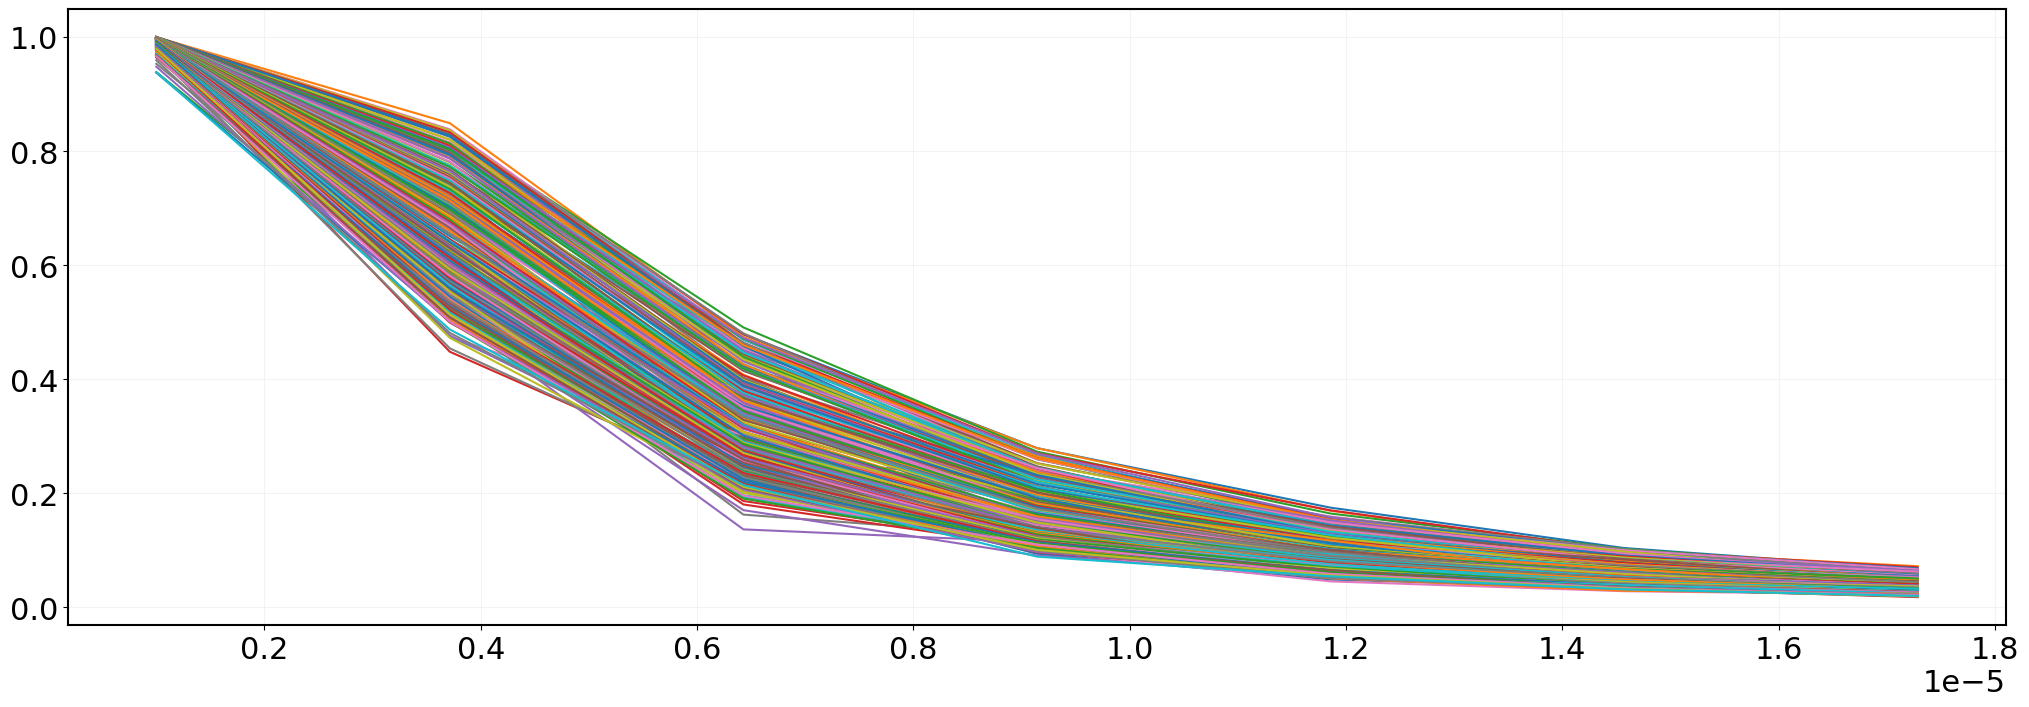

In [128]:
# Used for the fitting:
def residual(T, x_pts, data, uncertainties, initial_survival, tweezer_depth):
    model = get_survival_release_capture(x_pts, T, initial_survival=initial_survival, tweezer_depth=tweezer_depth)
    return (((model-data)/uncertainties)**2).sum()
surv = avgTferData1[0:7]
surv_unc = [np.mean([up,lo]) for (up,lo) in zip(err1[0][0:7],err1[1][0:7])]
x_axis = key1[0:7]
init_surv = avgTferData1[0]
trap_depth = 1e-3
rranges = (slice(40e-6, 100e-6, 0.2e-6),)
out, fout, grid, fgrid = optimize.brute(residual,rranges, 
    args=(x_axis*1e-3, surv, surv_unc, init_surv, trap_depth), full_output=True, finish='leastsq')

Optimized BetaPrime: 1.2000005509017453


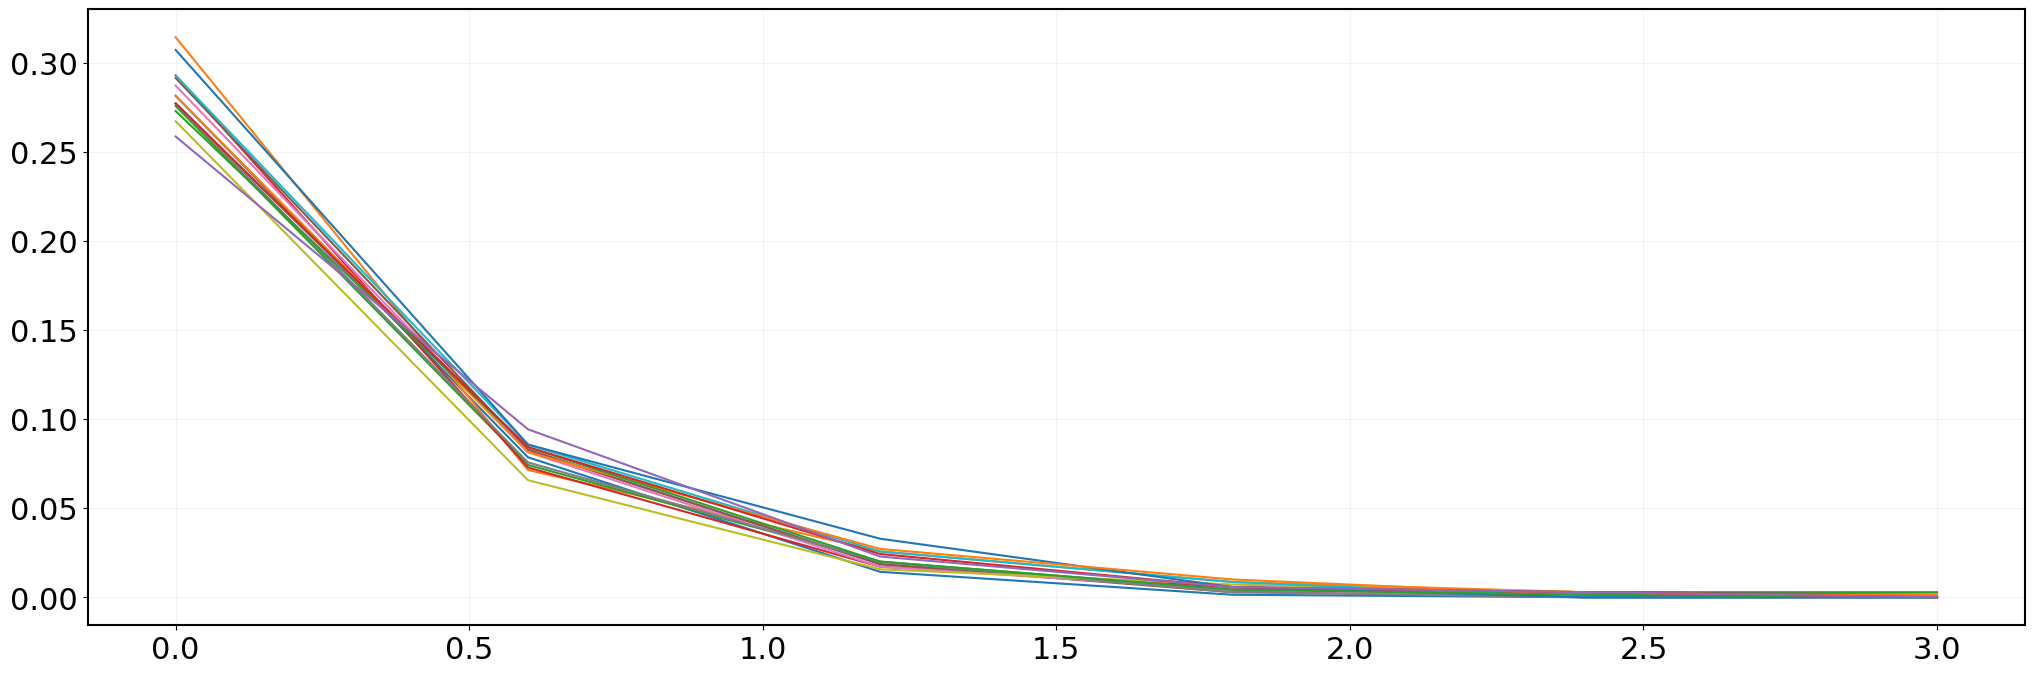

In [427]:
x_data = np.array([0.0001, 0.60008, 1.20006, 1.8000399999999999, 2.40002, 3.0])
y_data = np.array([1, 0.379746835443038, 0.23376623376623376, 0.2, 0.18518518518518517, 0.16901408450704225])

# Define initial parameter guesses
initial_guesses = (1.2, 2.3)  # Initial guess for betaPrime and fixed initial survival

# Use curve_fit to fit the data
params, covariance = curve_fit(betaPrimeFit, x_data, y_data, p0=initial_guesses)

# Extract the optimized parameter values
optimized_betaPrime, _ = params

# Print the optimized parameter
print("Optimized BetaPrime:", optimized_betaPrime)

# Generate the fitted curve using the optimized parameters
fitted_curve = betaPrimeFit(x_data, optimized_betaPrime, 1)

Optimized BetaPrime: 1.8


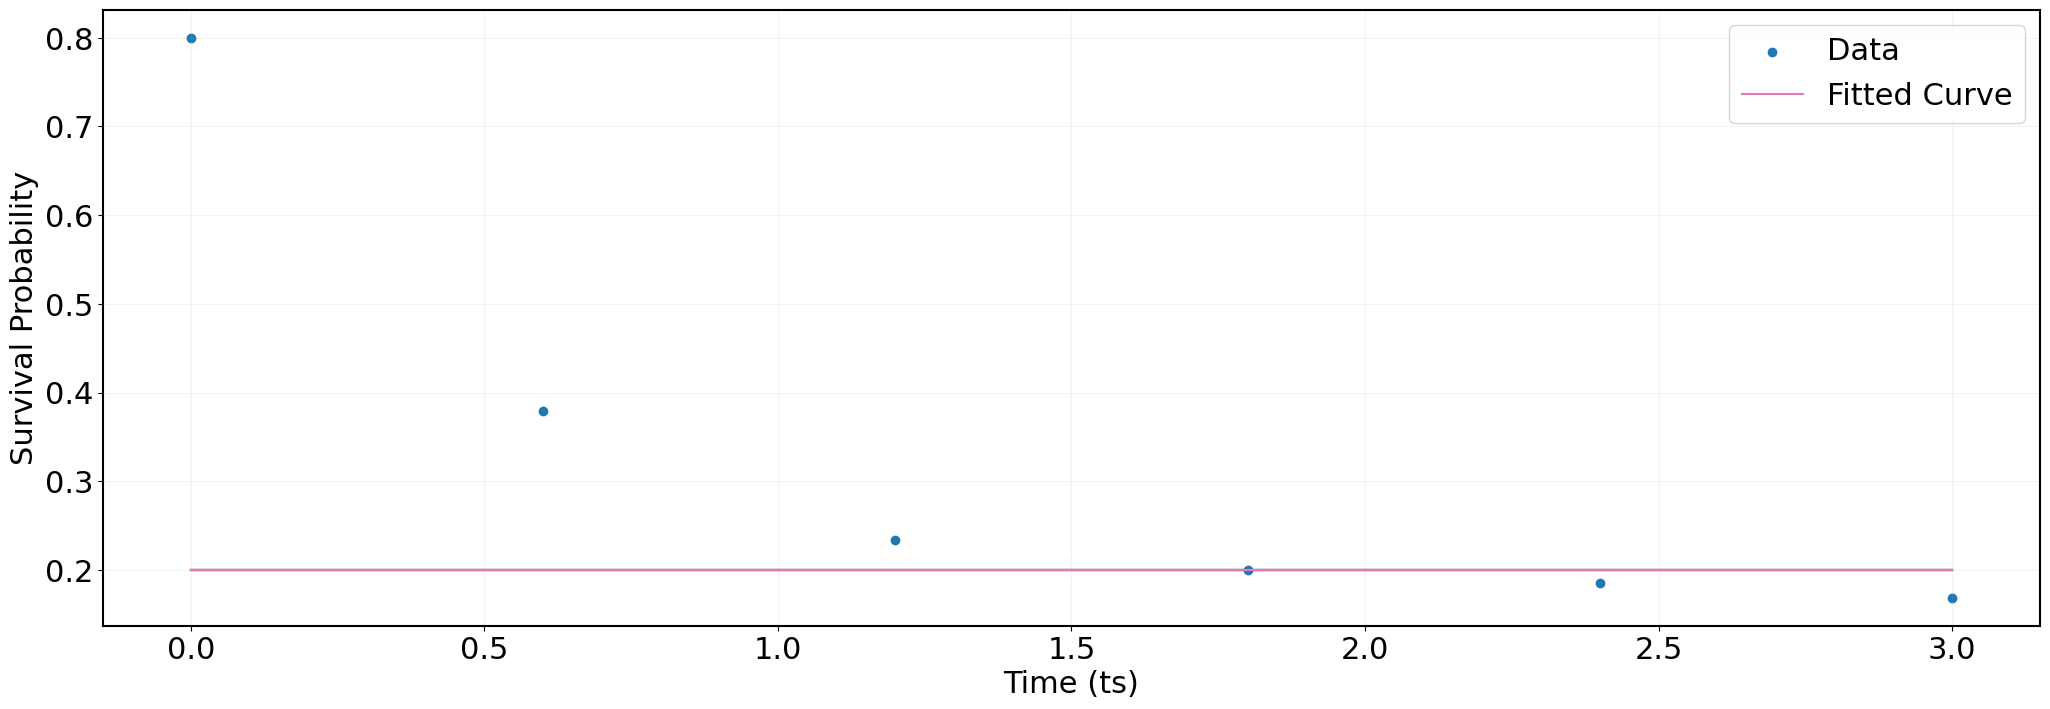

In [386]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define the x data and y data
x_data = np.array([0.0001, 0.60008, 1.20006, 1.8000399999999999, 2.40002, 3.0])
y_data = np.array([0.8, 0.379746835443038, 0.23376623376623376, 0.2, 0.18518518518518517, 0.16901408450704225])

# Provide a better initial guess for betaPrime
initial_guesses = (1.8, 0.8)  # Initial guess for betaPrime and fixed initial survival

# Use curve_fit to fit the data
params, covariance = curve_fit(betaPrimeFit, x_data, y_data, p0=initial_guesses)

# Extract the optimized parameter values
optimized_betaPrime, _ = params

# Print the optimized parameter
print("Optimized BetaPrime:", optimized_betaPrime)

# Generate the fitted curve using the optimized parameters
fitted_curve = betaPrimeFit(x_data, optimized_betaPrime, 0.8)

# Plot the data and fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, fitted_curve, label='Fitted Curve')
plt.legend()
plt.xlabel('Time (ts)')
plt.ylabel('Survival Probability')
plt.show()


## scipy minimize

Optimized BetaPrime: 1602.235297265471


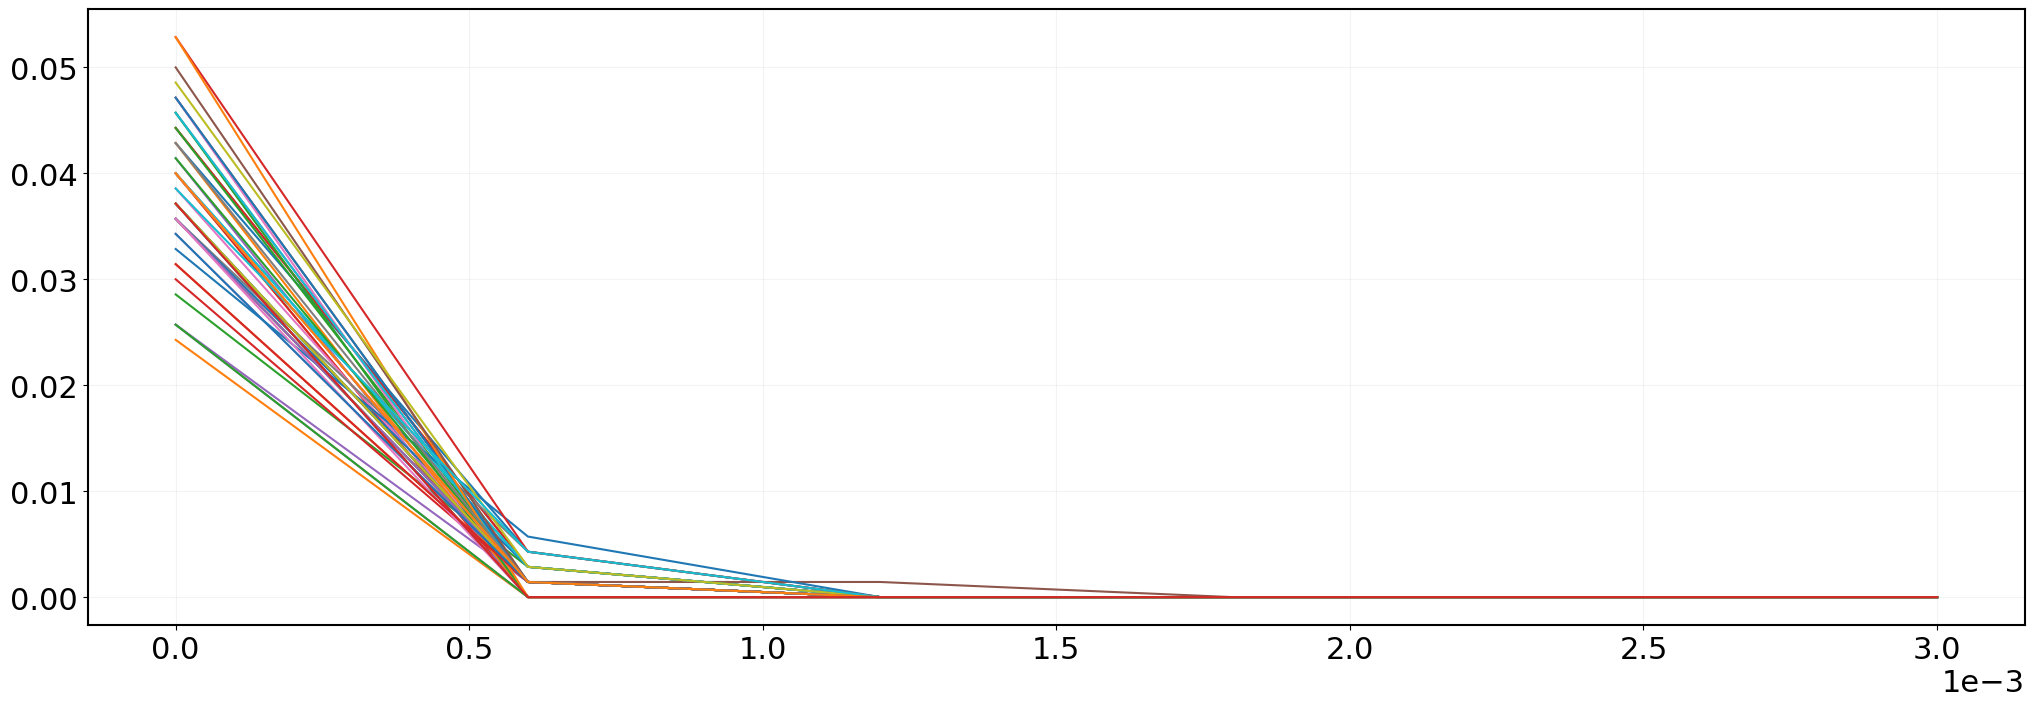

In [428]:
surv = [0.8, 0.379746835443038, 0.23376623376623376, 0.2, 0.18518518518518517, 0.16901408450704225]
surv_unc = [0.054296293277601465, 0.054275030368610255, 0.048003181199335734, 0.05196580809182996, 0.04301336058149732, 0.04432875825705168]
x_axis = [0.0001, 0.60008, 1.20006, 1.8000399999999999, 2.40002, 3.0]
x_axis = [x*1e-3 for x in x_axis]
def residual(betaPrime, x_pts, data, uncertainties):
    model = betaPrimeFit(x_pts, betaPrime,1)
    return (((model - data) / uncertainties) ** 2).sum()

# Initial guess for betaPrime
initial_guess = 1.6e3

# Fit the model to the data using minimize
result = minimize(residual, initial_guess, args=(x_axis, surv, surv_unc), method='trust-constr' )

# Extract the optimized betaPrime
optimized_betaPrime = result.x[0]

# Print the optimized parameter
print("Optimized BetaPrime:", optimized_betaPrime)


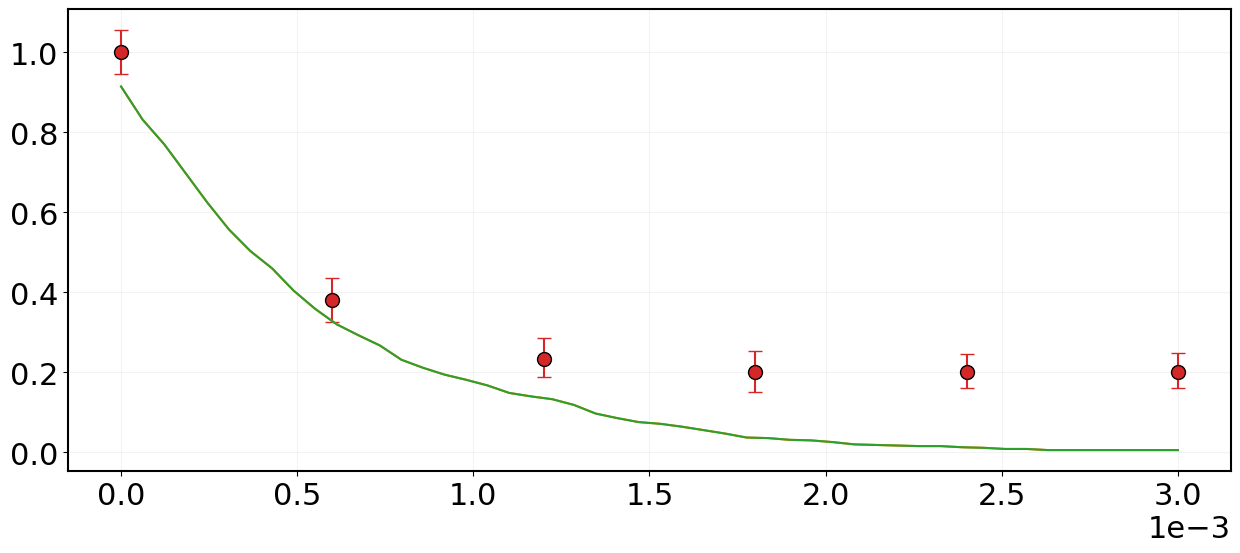

In [429]:
times= np.linspace(0, 3e-3, 50)
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
plt.plot(times, betaPrimeFit(times,optimized_betaPrime,0.8))
# ax[0].legend()
# ax[0].set_xlabel(r"pulse duration (s))")
# ax[0].set_title("survival")

## Test fit

Text(0.5, 1.0, 'survival')

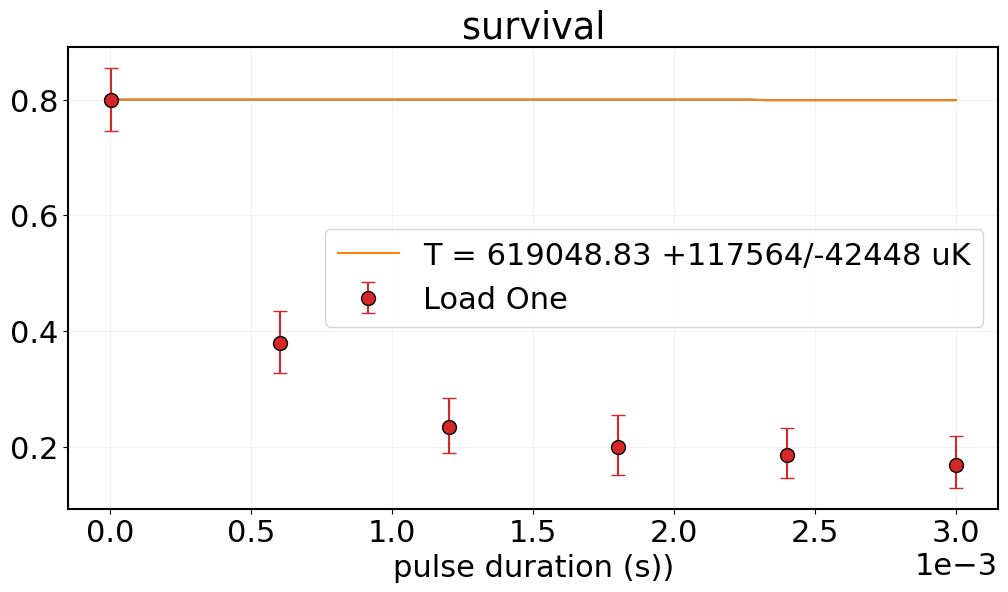

In [253]:

f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
grid_min, loss_min = get_minimum(f_loss_smooth, out)
grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
low_err=grid_min[0]-grid_min_err_low # those turns out to be array with only one element
high_err=grid_min_err_high-grid_min[0]
popt_min=grid_min[0]
loss_mins=loss_min
# print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)
fig,ax = plt.subplots(1, figsize=[12,6])
ax = [ax]

times= np.linspace(0, 3e-3, 50)
ax[0].plot(times, betaPrimeFit(times,popt_min), 
        label= f"T = {popt_min*1e6:.2f} +{high_err*1e6:.0f}/-{low_err*1e6:.0f} uK")
ax[0].errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
ax[0].legend()
ax[0].set_xlabel(r"pulse duration (s))")
ax[0].set_title("survival")

## make function for Analysis Helpers

In [40]:
def releaseRecaptureTemp(xData,survivalData,errorBars,tempGuess=60e-6,trapDepth=1e-3,rrange=(30e-6,100e-6,0.2e-6)):
    surv = survivalData
    surv_unc = [np.mean([up,lo]) for (up,lo) in zip(errorBars[0][0:len(surv)],errorBars[1][0:len(surv)])]
    x_axis = xData[0:len(surv)]
    temps_guess = tempGuess 
    init_surv = surv[0]
    trap_depth = trapDepth
    rranges = (slice(rrange[0], rrange[1], 0.2e-6),)
    out, fout, grid, fgrid = optimize.brute(residual,rranges, 
        args=(x_axis*1e-3, surv, surv_unc, init_surv, trap_depth), full_output=True, finish='leastsq')
    f_loss_smooth = get_smoothed_residual_f(grid, fgrid)
    grid_min, loss_min = get_minimum(f_loss_smooth, out)
    grid_min_err_low = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid.min(), xbound1=grid_min)
    grid_min_err_high = get_root(f_loss_smooth, y0=loss_min*1.1, xbound0=grid_min, xbound1=grid.max())
    low_err=grid_min[0]-grid_min_err_low # those turns out to be array with only one element
    high_err=grid_min_err_high-grid_min[0]
    popt_min=grid_min[0]
    loss_mins=loss_min
    # print(grid_min, grid_min_err_low, grid_min_err_high, loss_min)
    times= np.linspace(0, xData[-1]e-3, 50)
    plt.plot(times, get_survival_release_capture(times, 
            popt_min, initial_survival=init_surv, tweezer_depth=trap_depth), 
            label= f"T = {popt_min*1e6:.2f} +{high_err*1e6:.0f}/-{low_err*1e6:.0f} uK")

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:6:2: on (Y-M-D) 2023-5-30, And ended at 14:9:40: on 2023-5-30
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

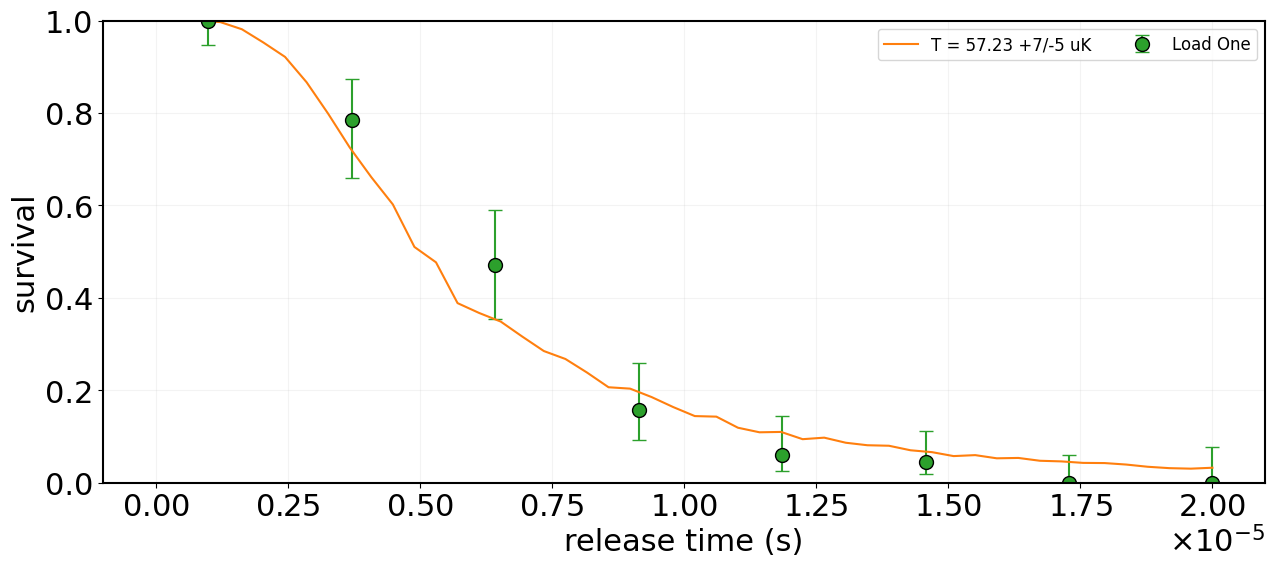

In [80]:
fileId = 22
threshold = 65

dataset1 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
 
plt.figure(dpi=1200)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6))
ticks = np.arange(0,max(key1),100)

temp_guess = 58e-6
trap_depth = 1e-3
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
ah.releaseRecaptureTemp(key1,avgTferData1[0:7],err1,tempGuess=temp_guess,trapDepth=trap_depth)
ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci", scilimits=(0, 0), axis="x")

Optimized BetaPrime: 0.6799999999999997


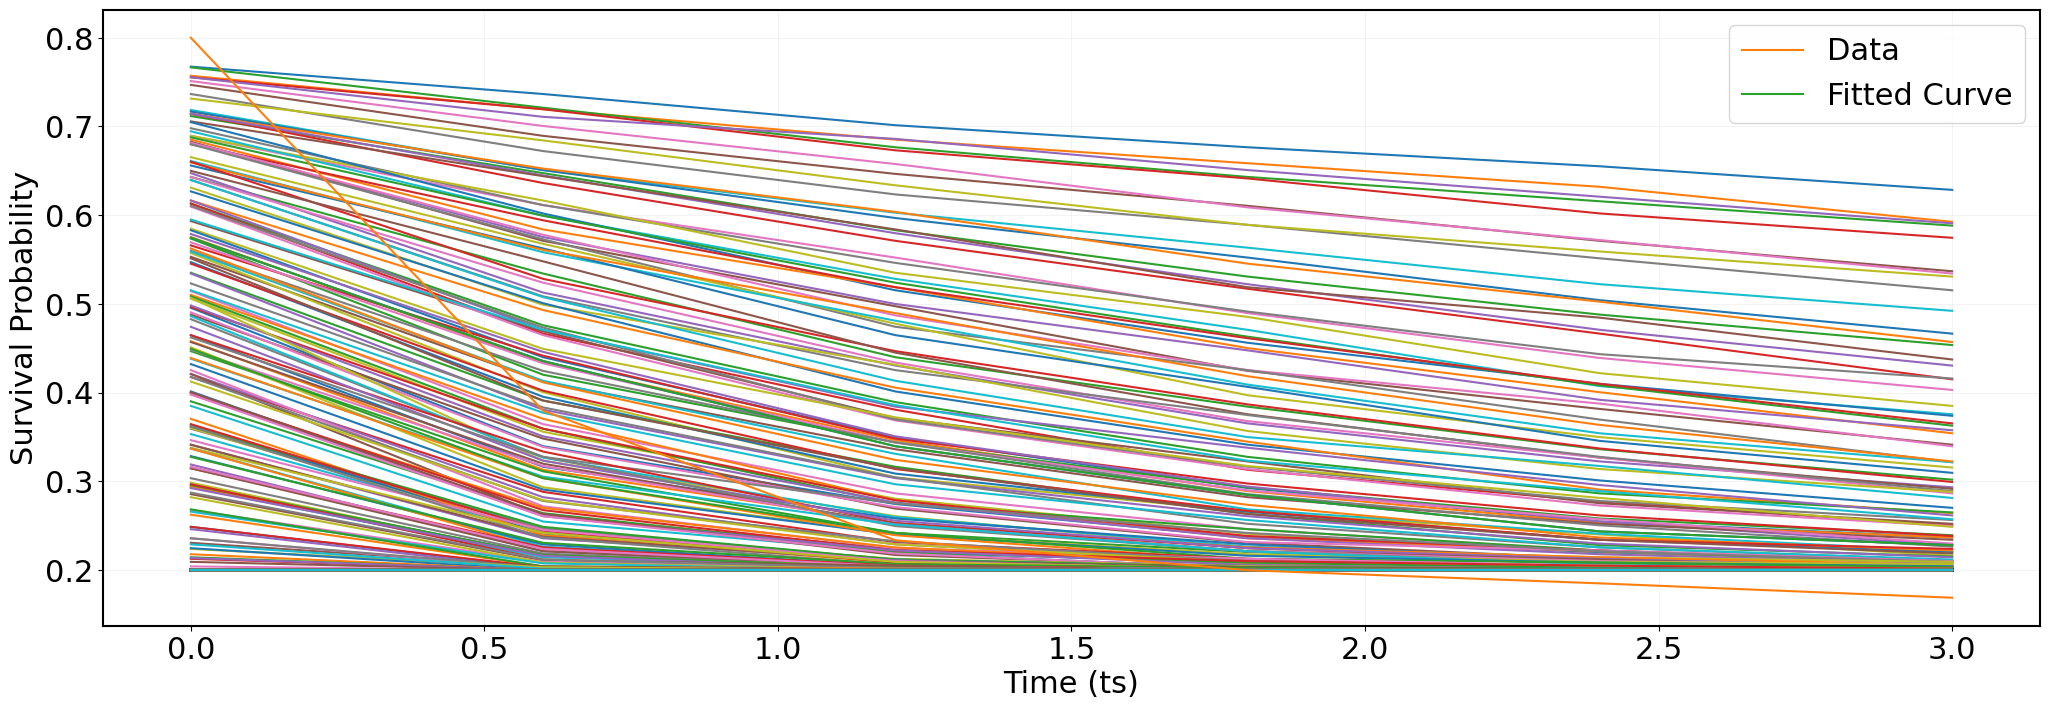

In [399]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Define your data
x_axis = [0.0001, 0.60008, 1.20006, 1.8000399999999999, 2.40002, 3.0]
surv = [0.8, 0.379746835443038, 0.23376623376623376, 0.2, 0.18518518518518517, 0.16901408450704225]
surv_unc = [0.054296293277601465, 0.054275030368610255, 0.048003181199335734, 0.05196580809182996, 0.04301336058149732, 0.04432875825705168]

# Define the residual function
def residual(betaPrime, x_pts, data, uncertainties, init_surv=0.8):
    model = betaPrimeFit(x_pts, betaPrime, init_surv)
    return (((model - data) / uncertainties) ** 2).sum()

# Define the range of betaPrime values to search
betaPrime_range = (slice(0.1, 5.0, 0.01),)

# Perform brute-force optimization
out, fout, grid, fgrid = optimize.brute(
    residual,
    betaPrime_range,  # Pass a single-element tuple for betaPrime
    args=(x_axis, surv, surv_unc),
    full_output=True,
    finish=None  # No additional optimization step
)

# Extract the optimized betaPrime
optimized_betaPrime = out

# Print the optimized parameter
print("Optimized BetaPrime:", optimized_betaPrime)

# Plot the fitted curve using the optimized parameter
fitted_curve = betaPrimeFit(x_axis, optimized_betaPrime, initial_survival=0.8)
plt.plot(x_axis, surv, label='Data')
plt.plot(x_axis, fitted_curve, label='Fitted Curve')
plt.xlabel('Time (ts)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


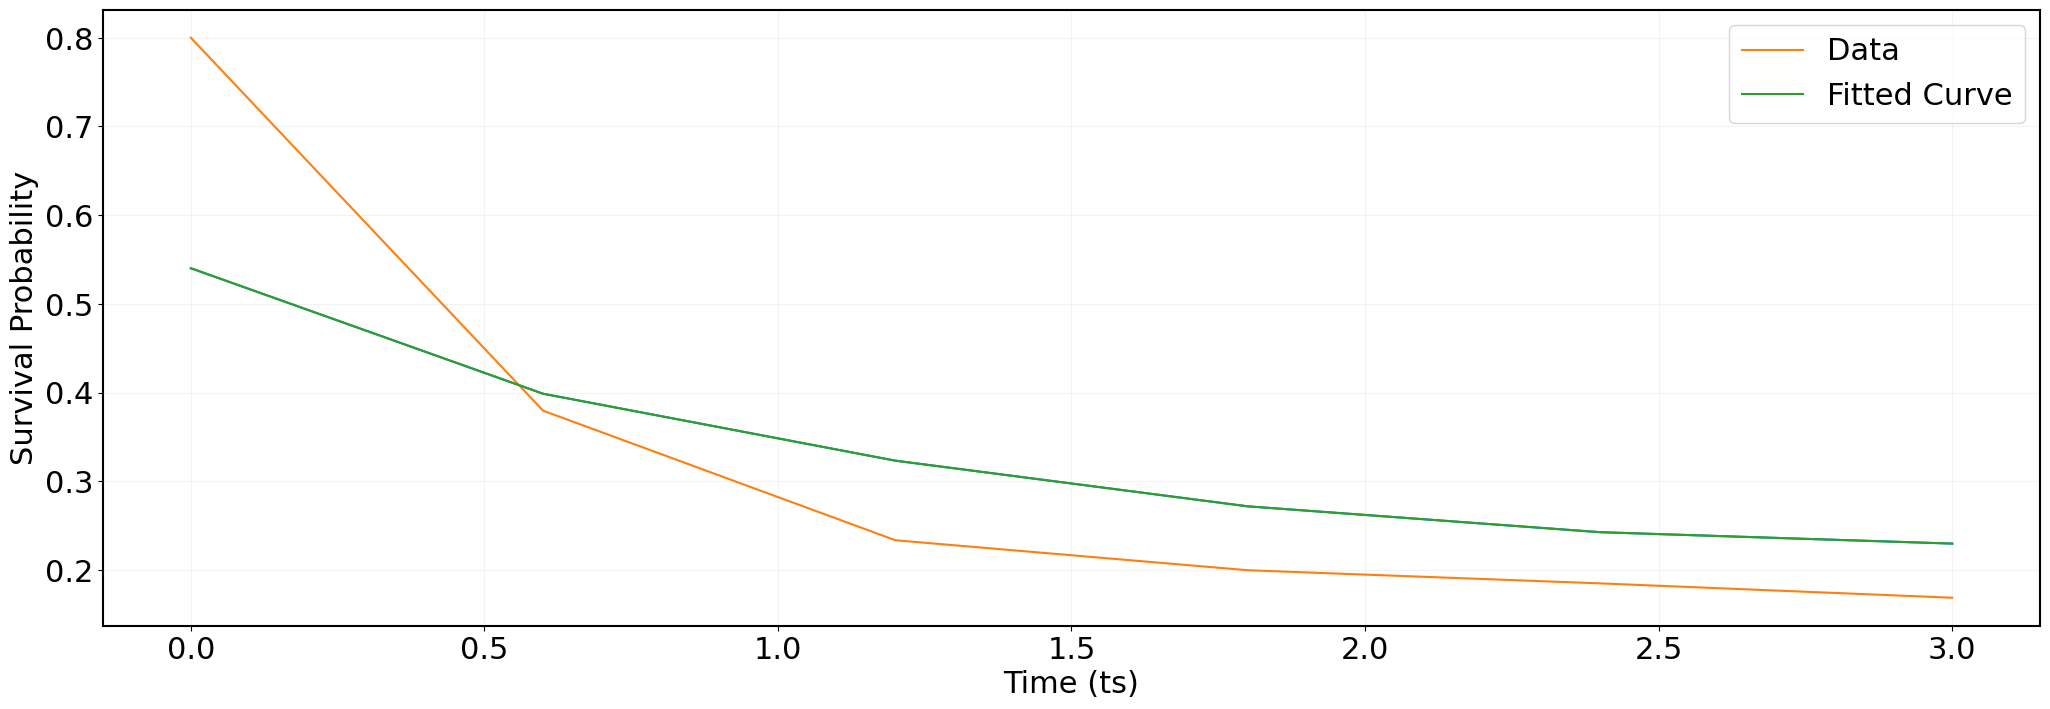

In [400]:
# Plot the fitted curve using the optimized parameter
fitted_curve = betaPrimeFit(x_axis, optimized_betaPrime, initial_survival=0.8)
plt.plot(x_axis, surv, label='Data')
plt.plot(x_axis, fitted_curve, label='Fitted Curve')
plt.xlabel('Time (ts)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

Optimized BetaPrime: 0.8000000000000014


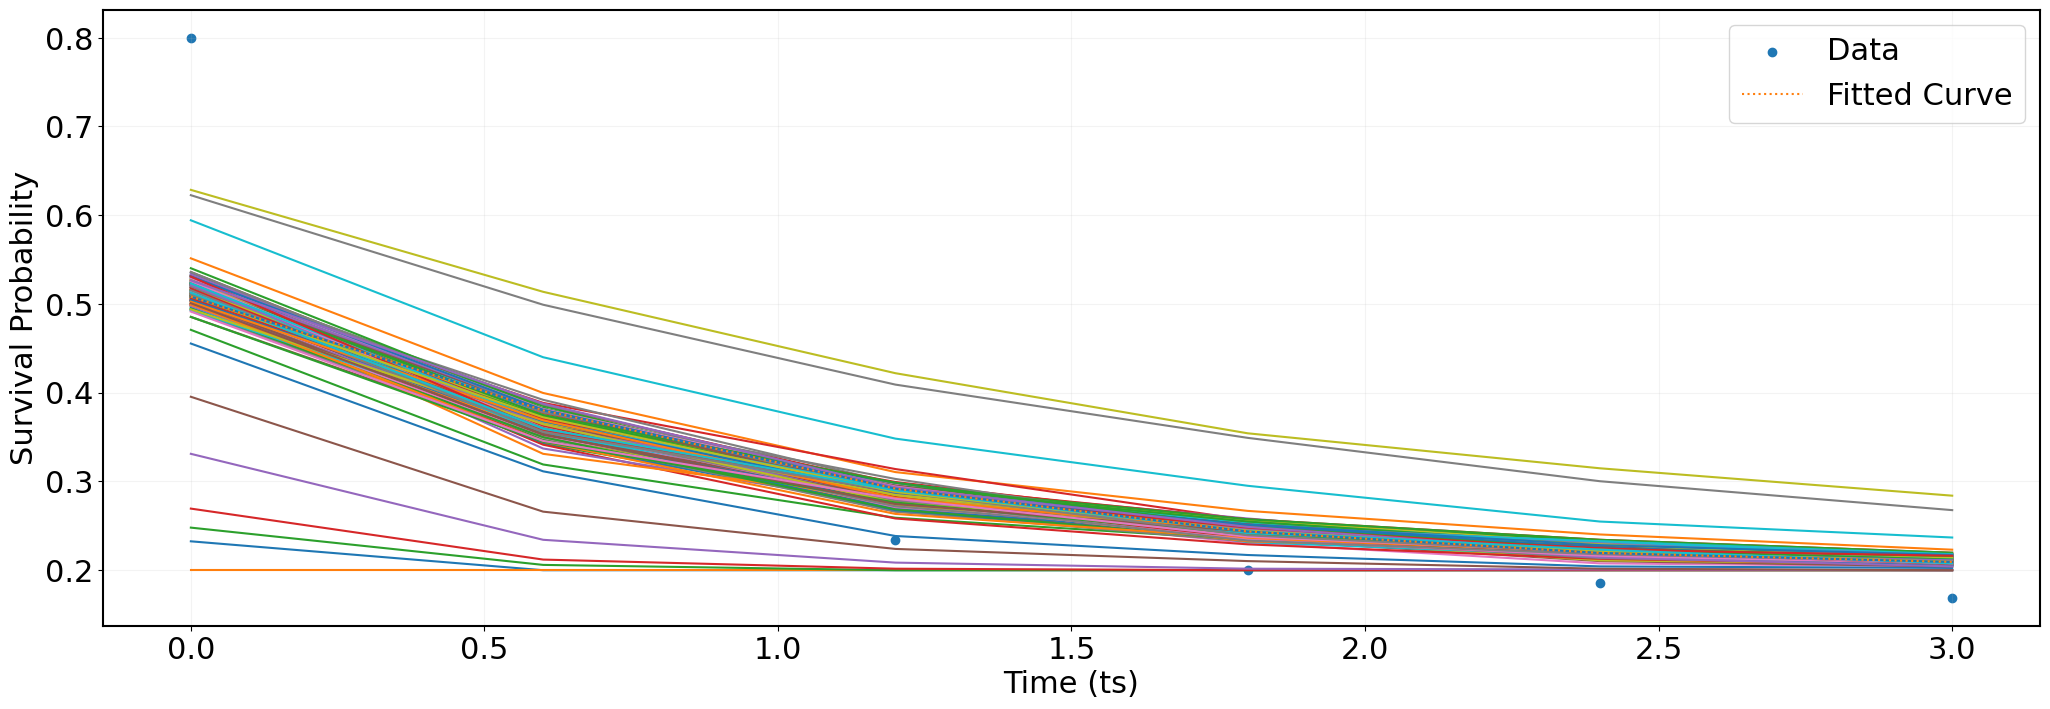

In [408]:
from scipy.optimize import minimize

# Define bounds for betaPrime
bounds = [(0.1, 5.0)]  # Adjust the bounds as needed

# Perform optimization with bounds and 'Nelder-Mead' method
result = minimize(residual, [1.6], args=(x_axis, surv, surv_unc), method='Nelder-Mead', bounds=bounds)

# Extract the optimized betaPrime
optimized_betaPrime = result.x[0]

# Print the optimized parameter
print("Optimized BetaPrime:", optimized_betaPrime)

# Plot the fitted curve using the optimized parameter
fitted_curve = betaPrimeFit(x_axis, optimized_betaPrime, initial_survival=.85)
plt.scatter(x_axis, surv, label='Data')
plt.plot(x_axis, fitted_curve, label='Fitted Curve',linestyle=':')
plt.xlabel('Time (ts)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()
